## Import packages

In [2]:
# import uproot
# import pyjet
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import sys, os
from os.path import isfile, isdir, join
import importlib
import time
import re
import glob
from tqdm import tqdm
from sklearn.utils import shuffle
import logging
logging.basicConfig(level = logging.INFO)

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable


Oranges = cm.get_cmap('Oranges_r', 256)
newcolors = Oranges(np.linspace(1, 0, 256))
white = np.array([256/256, 256/256, 256/256, 1])
newcolors[:1, :] = white
newcmap = ListedColormap(newcolors, name='OrangeWhite')

%config InlineBackend. figure_format = 'retina'

In [3]:
"""
Define Collector
"""

def loading_data(imagepath: str, data_dict: pd.DataFrame, start: int=0, stop: int=20000)-> np.array: 
    x_leanding_jet = []
    x_subleanding_jet = []
    x_rotated_event = []
    y = []

    logging.info("Collect Data from {} to {}.".format(start,stop))
    time.sleep(0.5)
    for img_index in tqdm(range(start,stop)):
        x_train_path = imagepath + data_dict["Image"].iloc[img_index]

        x_train_leanding_jet = np.load(x_train_path)["leading_jet_image"]
        x_train_leanding_jet = np.nan_to_num(x_train_leanding_jet)
        x_leanding_jet.append(x_train_leanding_jet)

        x_train_subleanding_jet = np.load(x_train_path)["subleading_jet_image"]
        x_train_subleanding_jet = np.nan_to_num(x_train_subleanding_jet)
        x_subleanding_jet.append(x_train_subleanding_jet)

        x_train_rotated_event = np.load(x_train_path)["rotated_event_image"]
        x_train_rotated_event = np.nan_to_num(x_train_rotated_event)
        x_rotated_event.append(x_train_rotated_event)

        # x_jet_tmp = np.divide((x_jet_tmp - norm_dict[0]), (np.sqrt(norm_dict[1])+1e-5))#[0].reshape(1,40,40)
        if data_dict["Y"].iloc[img_index] == 0:
            y.append(["0"])
        if data_dict["Y"].iloc[img_index] != 0:
            y.append(["1"])


        # if img_index == stop:
        #     break

    return [np.asarray(x_leanding_jet), np.asarray(x_subleanding_jet), np.asarray(x_rotated_event)], np.asarray(y)


## Read Data

In [4]:
%%time

HOMEPATH = "/home/u5/THDM/"
ImagePath =  HOMEPATH + "Image_Directory/"
savepath = HOMEPATH + "Image_Directory/"

process = {
            "ppHhh" : 0,
            "ttbar" : 0,
            "ppbbbb" : 0,
            # "ppjjjb" : 0,
            "ppjjjj" : 0,
              }  
    
for i, element in enumerate(process):
    process[element] = pd.read_csv(savepath + str(element) + "_dict.csv")

    # logging.info("\r")
    logging.info("There are {} in {} data.".format(len(process[element]),element))


x_ppHhh, y_ppHhh = loading_data(imagepath = ImagePath, data_dict = process["ppHhh"], start=0, stop=10000)
x_ttbar, y_ttbar = loading_data(imagepath = ImagePath, data_dict = process["ttbar"], start=0, stop=10000)
x_ppbbbb, y_ppbbbb = loading_data(imagepath = ImagePath, data_dict = process["ppbbbb"], start=0, stop=10000)
x_ppjjjj, y_ppjjjj = loading_data(imagepath = ImagePath, data_dict = process["ppjjjj"], start=0, stop=10000)



INFO:root:There are 602582 in ppHhh data.
INFO:root:There are 35036 in ttbar data.
INFO:root:There are 277362 in ppbbbb data.
INFO:root:There are 2018435 in ppjjjj data.
INFO:root:Collect Data from 0 to 10000.
100%|██████████| 10000/10000 [00:21<00:00, 455.93it/s]
INFO:root:Collect Data from 0 to 10000.
100%|██████████| 10000/10000 [00:21<00:00, 466.48it/s]
INFO:root:Collect Data from 0 to 10000.
100%|██████████| 10000/10000 [00:21<00:00, 465.54it/s]
INFO:root:Collect Data from 0 to 10000.
100%|██████████| 10000/10000 [00:21<00:00, 465.54it/s]


CPU times: user 1min 25s, sys: 5.79 s, total: 1min 30s
Wall time: 1min 32s


# Generate Images

In [5]:
"""
Images
"""
def generate_images(Leading_Jet_File: np.array, SubLeading_Jet_File: np.array, Rotated_Event_File: np.array ):

    for channel in range(3):  #0: charged pt, 1: neutral pt, 2: charged multiplicity 

        images = [ Leading_Jet_File[:,channel][:10000], SubLeading_Jet_File[:,channel][:10000], Rotated_Event_File[:,channel][:10000]]


        name = ["Leading Jet", "Subleading Jet", "Event"]


        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 60))

        for index, ax in enumerate(axes.flat):

            eventimage_average = np.average(images[index],axis=0)

            im = ax.imshow(eventimage_average,
                                    vmin=0, 
        #                           vmax=round(np.max(jetimage_average),3),
        #                           vmax=0.08,
                                cmap=newcmap, 
                            origin='lower')
            if index == 2:
                im = ax.imshow(eventimage_average,
                                vmin=0,
                            cmap=newcmap, 
                            origin='lower')

            ax.set_yticks([0,20,40])
            ax.set_yticklabels(["","",""], fontsize=25, rotation=0)
            ax.tick_params(axis='y', direction="in")

        #     ax.set_xticks([0,20,40])
        #     ax.set_xticklabels(["","",""], fontsize=25, rotation=0)
        #     ax.tick_params(axis='x', direction="in")

            ax.set_xticks([0,20,40])
            ax.set_xticklabels(["-1","0","1"], fontsize=25, rotation=0, verticalalignment='top', horizontalalignment="center")
            ax.set_xlabel("$Q_1$", fontsize=25,horizontalalignment='right',x=1)
            ax.tick_params(axis='x', direction="in")

            if index == 0: 
                ax.set_yticks([0,20,40])
                # plot_axis.set_yticks([20,25,30])
                ax.set_yticklabels(["1","0","-1"], fontsize=25, rotation=0, verticalalignment='center', horizontalalignment="right")
                ax.set_ylabel("$Q_2$", fontsize=25, horizontalalignment='right',y=1)
        #         ax.text(x=2, y=38, s="Pythia Default",c="k",fontsize=25)

                ax.text(x=10, y=42.5, s=str(name[index]),fontsize=25)
        #         ax.text(x=2, y=38, s="p("+str(mode_name[index])+") > 0.9",fontsize=25)
                divider = make_axes_locatable(ax)
                cax = divider.append_axes("right", size="5%", pad="1%")
                cbar = plt.colorbar(im, cax=cax)
                cbar.ax.tick_params(labelsize=20)
                cbar.set_ticks(np.arange(0, 1, 0.02))


            elif index == 1:
        #         ax.text(x=0, y=36, s=str(mode_name[index]),fontsize=25)
                ax.text(x=10, y=42.5, s=str(name[index]),fontsize=25)
        #         ax.text(x=2, y=38, s="p("+str(mode_name[index])+") > 0.9",fontsize=25)
                divider = make_axes_locatable(ax)
                cax = divider.append_axes("right", size="5%", pad="1%")
                cbar = plt.colorbar(im, cax=cax)
                cbar.ax.tick_params(labelsize=20)
                cbar.set_ticks(np.arange(0, 1, 0.02))

            elif index == 2:
        #         ax.text(x=0, y=36, s=str(mode_name[index]),fontsize=25)
                ax.text(x=14, y=42.5, s=str(name[index]),fontsize=25)
        #         ax.text(x=2, y=38, s="p("+str(mode_name[index])+") > 0.9",fontsize=25)
                divider = make_axes_locatable(ax)
                cax = divider.append_axes("right", size="5%", pad="1%")
                cbar = plt.colorbar(im, cax=cax)
                cbar.ax.tick_params(labelsize=20)
                cbar.set_ticks(np.arange(0, 1, 0.02))


            # elif index == 2:
            #     ax.text(x=2, y=35.5, s=str(name[index]),fontsize=25, color="w")
            #     ax.text(x=2, y=42.5, s="(H-QCD)/(std. dev)", fontsize=25)

            else:
                pass


    #         if index == 1:
    #             ax.text(x=53, y=38, s="normalized to unity", fontsize=25, rotation=270)


        fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                            wspace=0.02, hspace=0.02)

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad="1%")
        cbar = plt.colorbar(im, cax=cax)
        cbar.ax.tick_params(labelsize=20)
        # cbar.set_ticks(np.arange(-0.1, 0.12, 0.04))


        plt.subplots_adjust(wspace=0.4, hspace=0.5)
    #     plt.savefig("./Plots/jet_image_H_sub_QCD_pythia_dip_"+str(channel)+".pdf", transparent=True, bbox_inches='tight')
        plt.show()

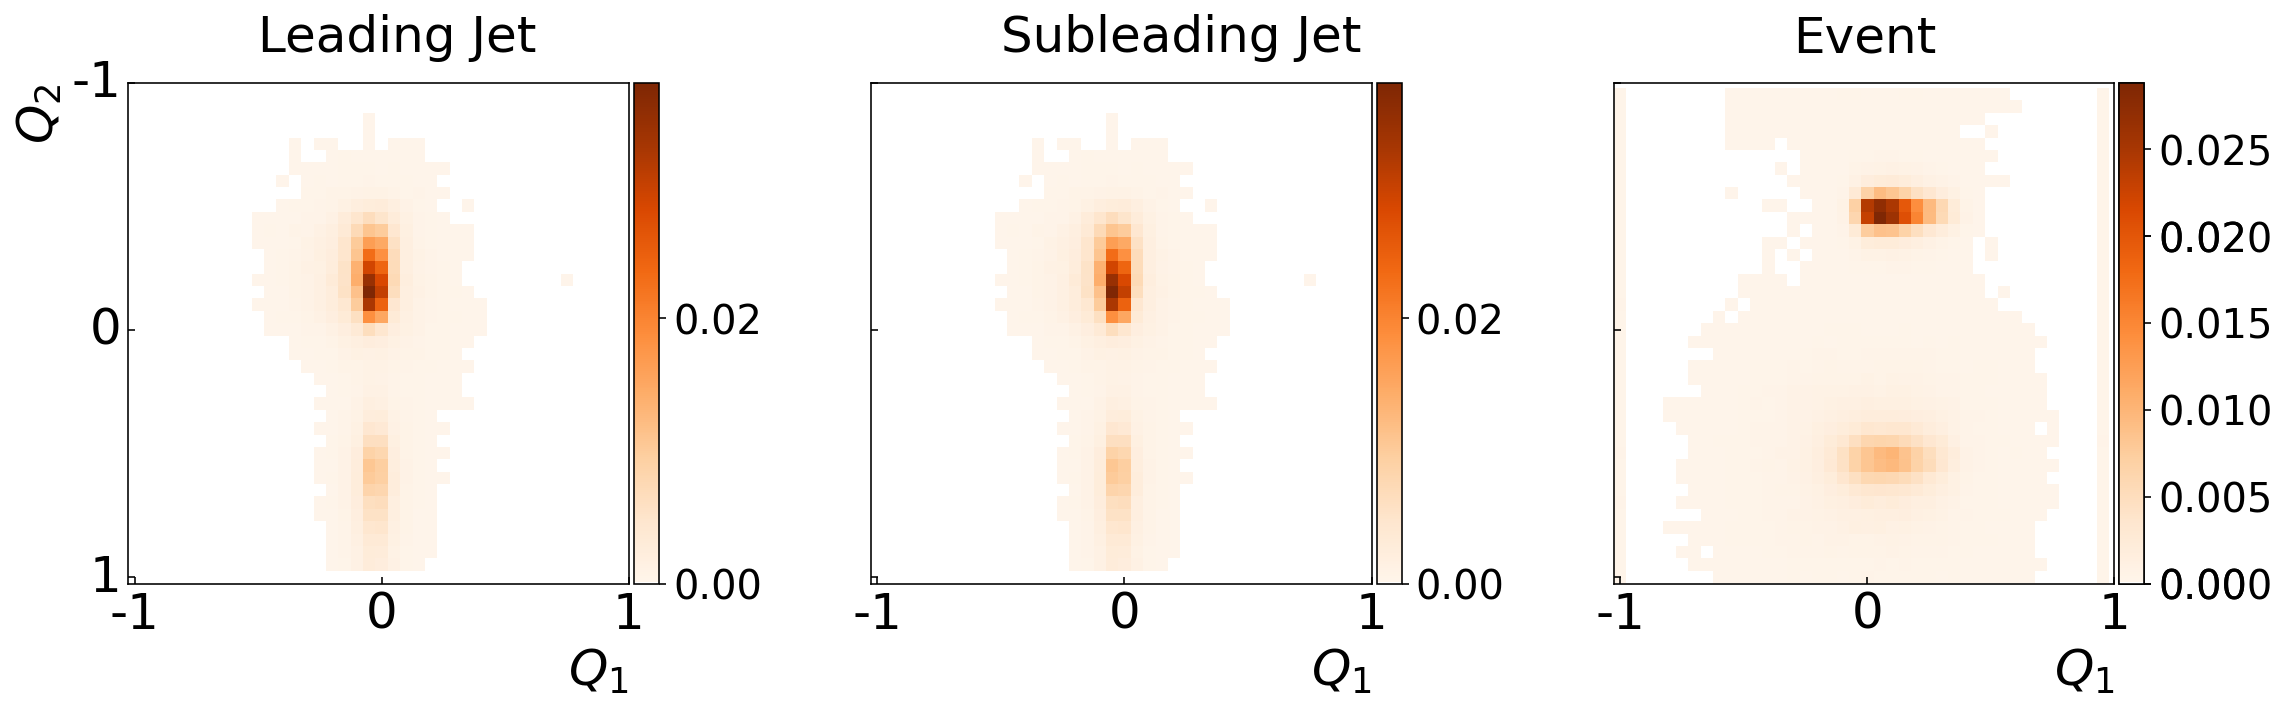

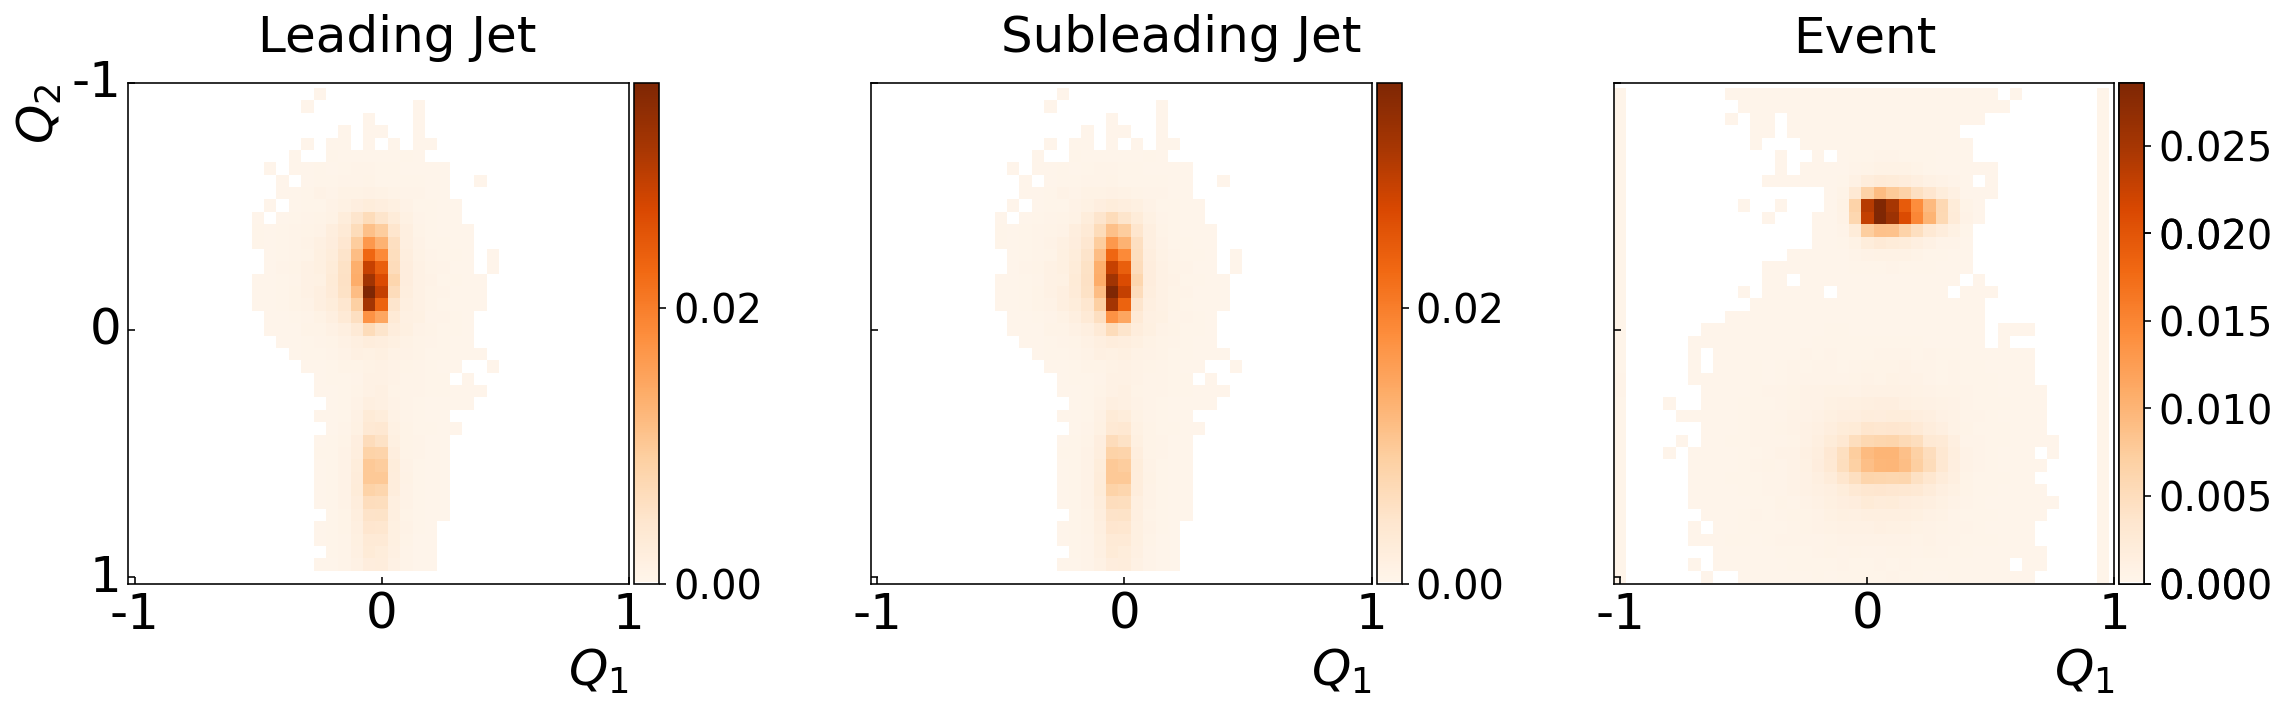

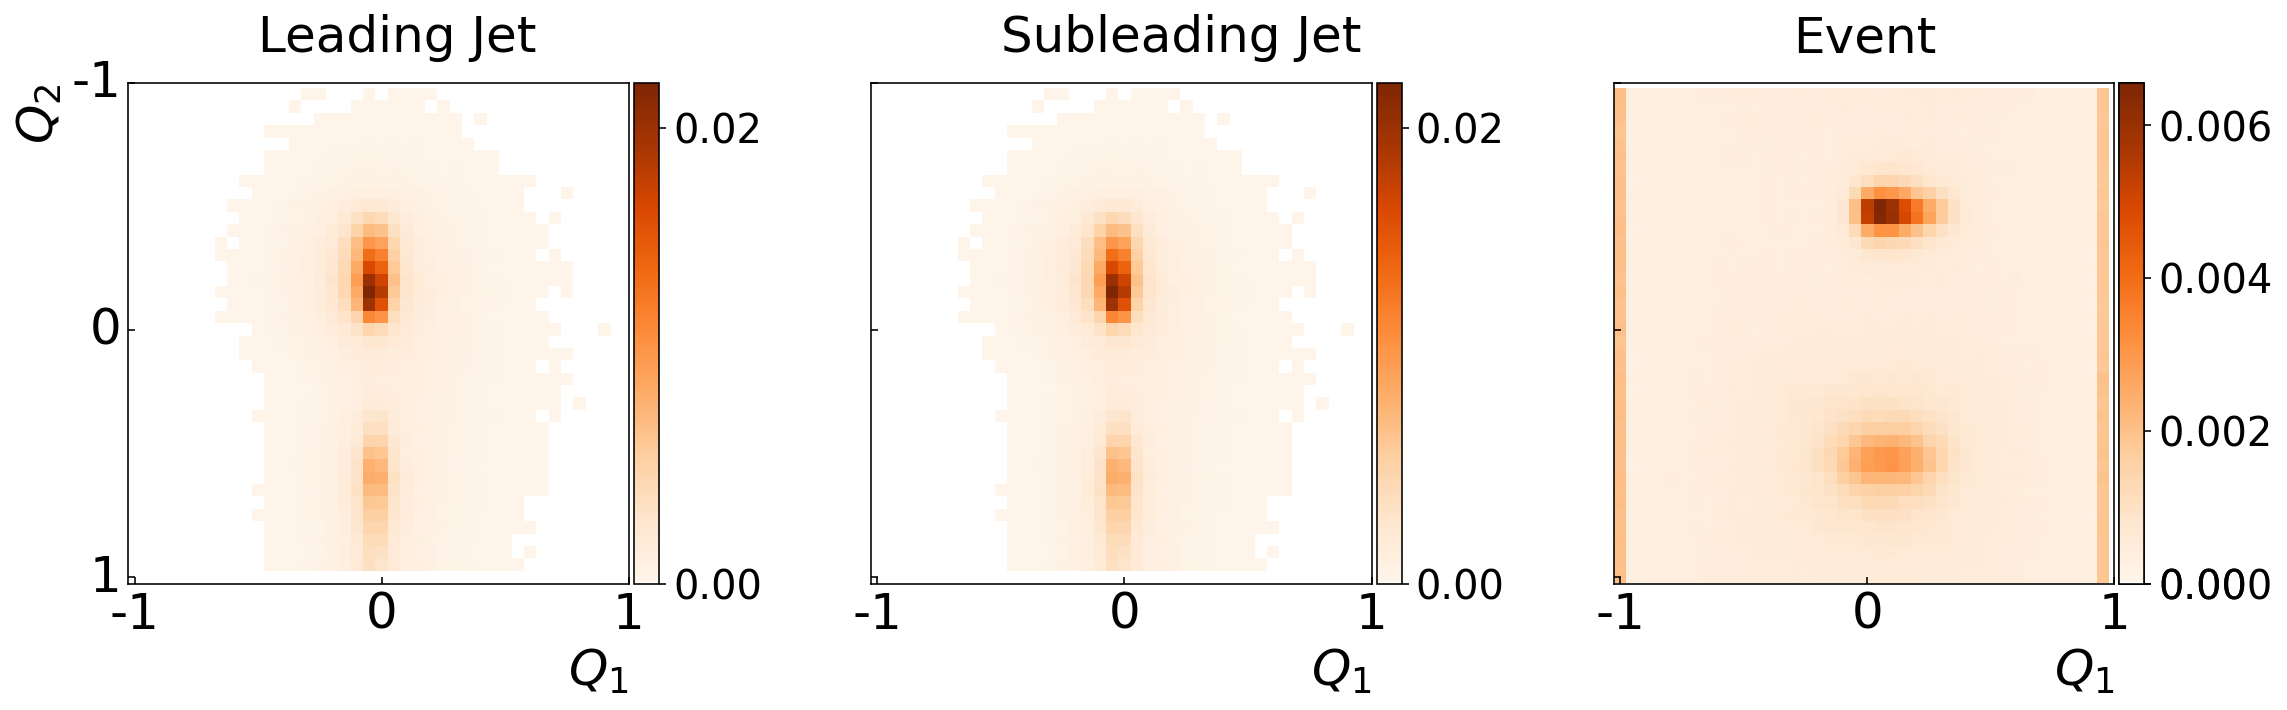

In [6]:
generate_images(x_ppHhh[0], x_ppHhh[1], x_ppHhh[2])

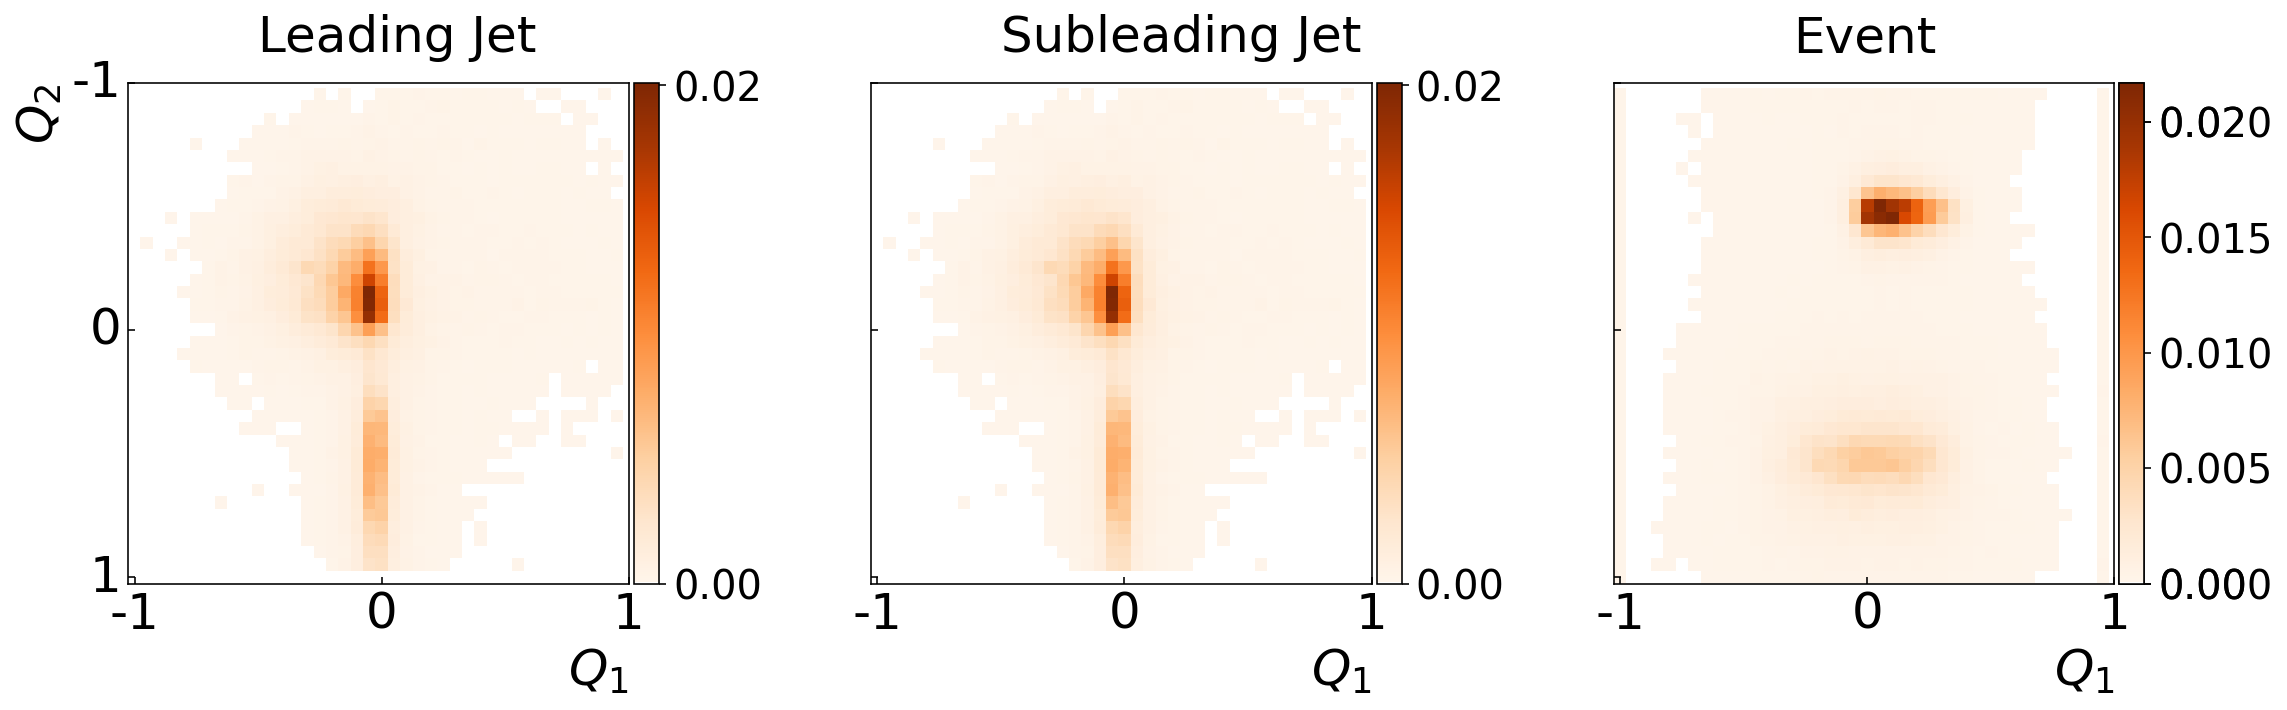

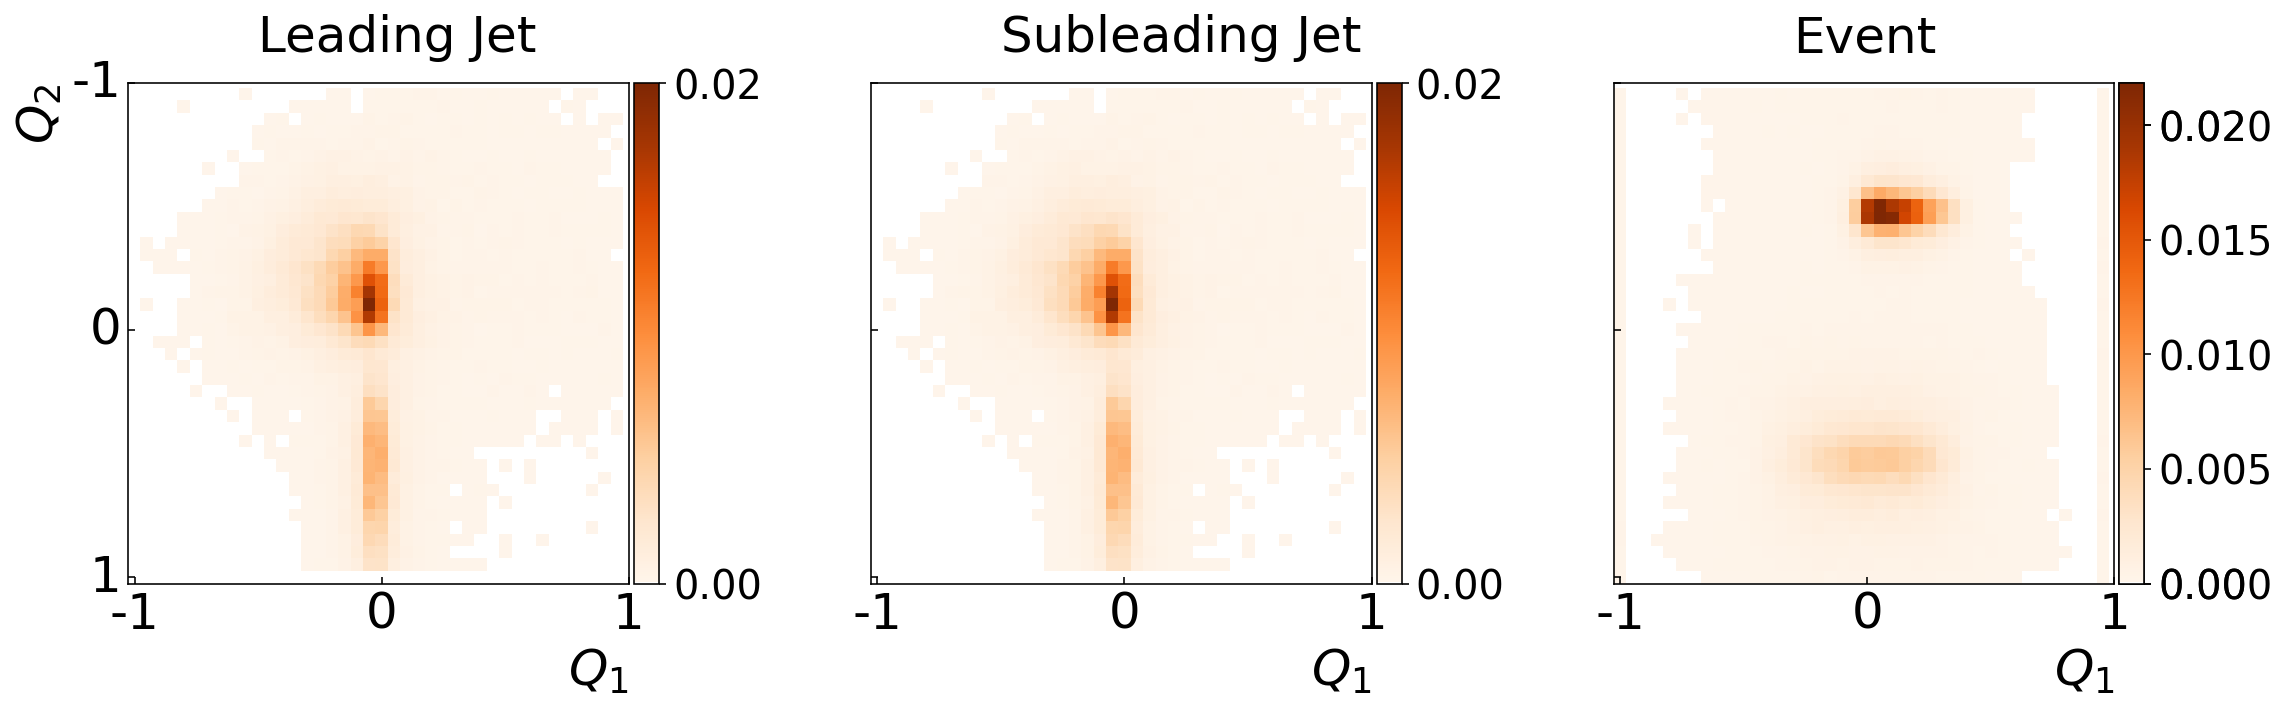

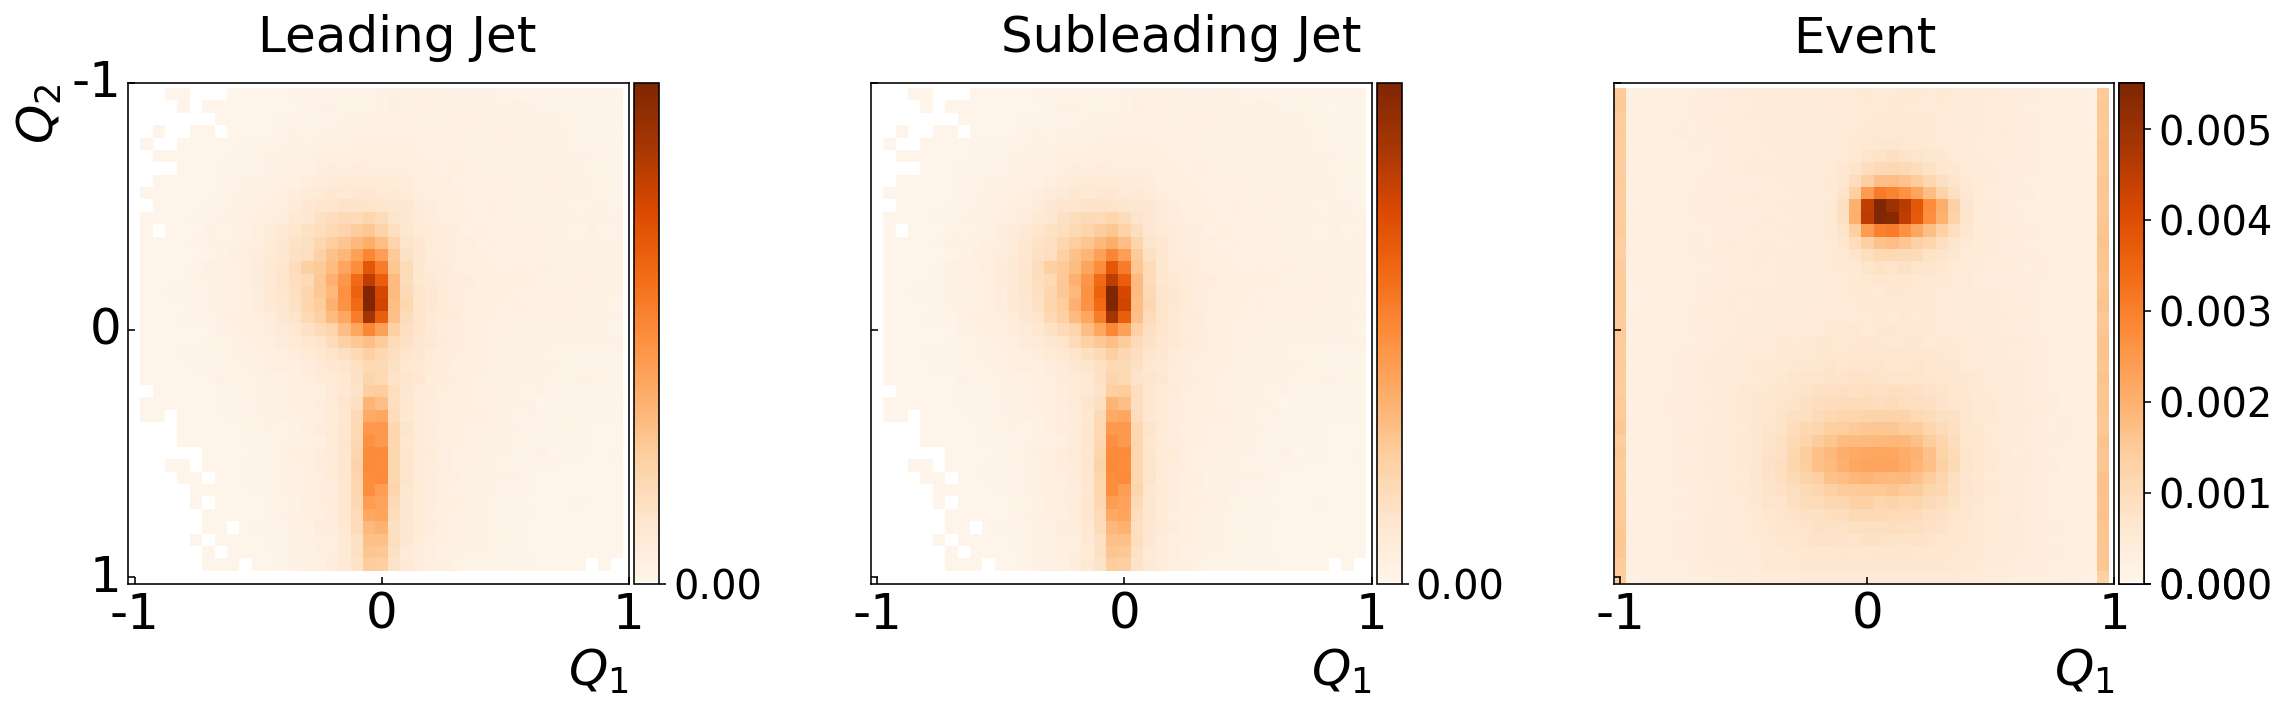

In [7]:
generate_images(x_ttbar[0], x_ttbar[1], x_ttbar[2])

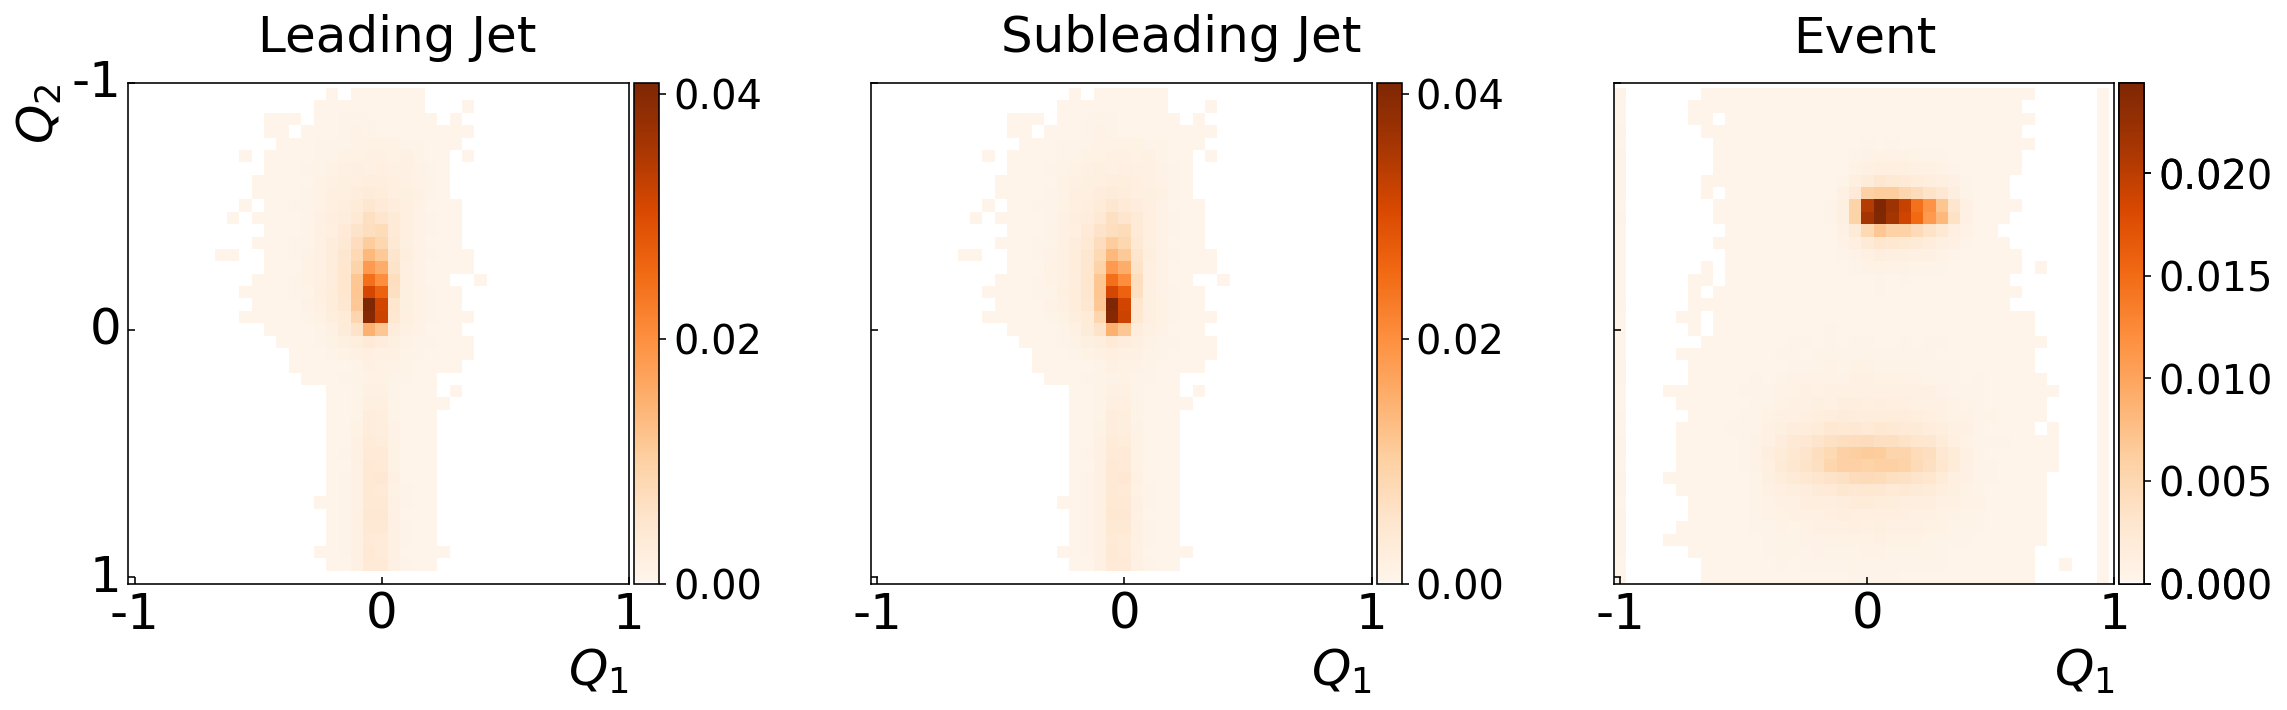

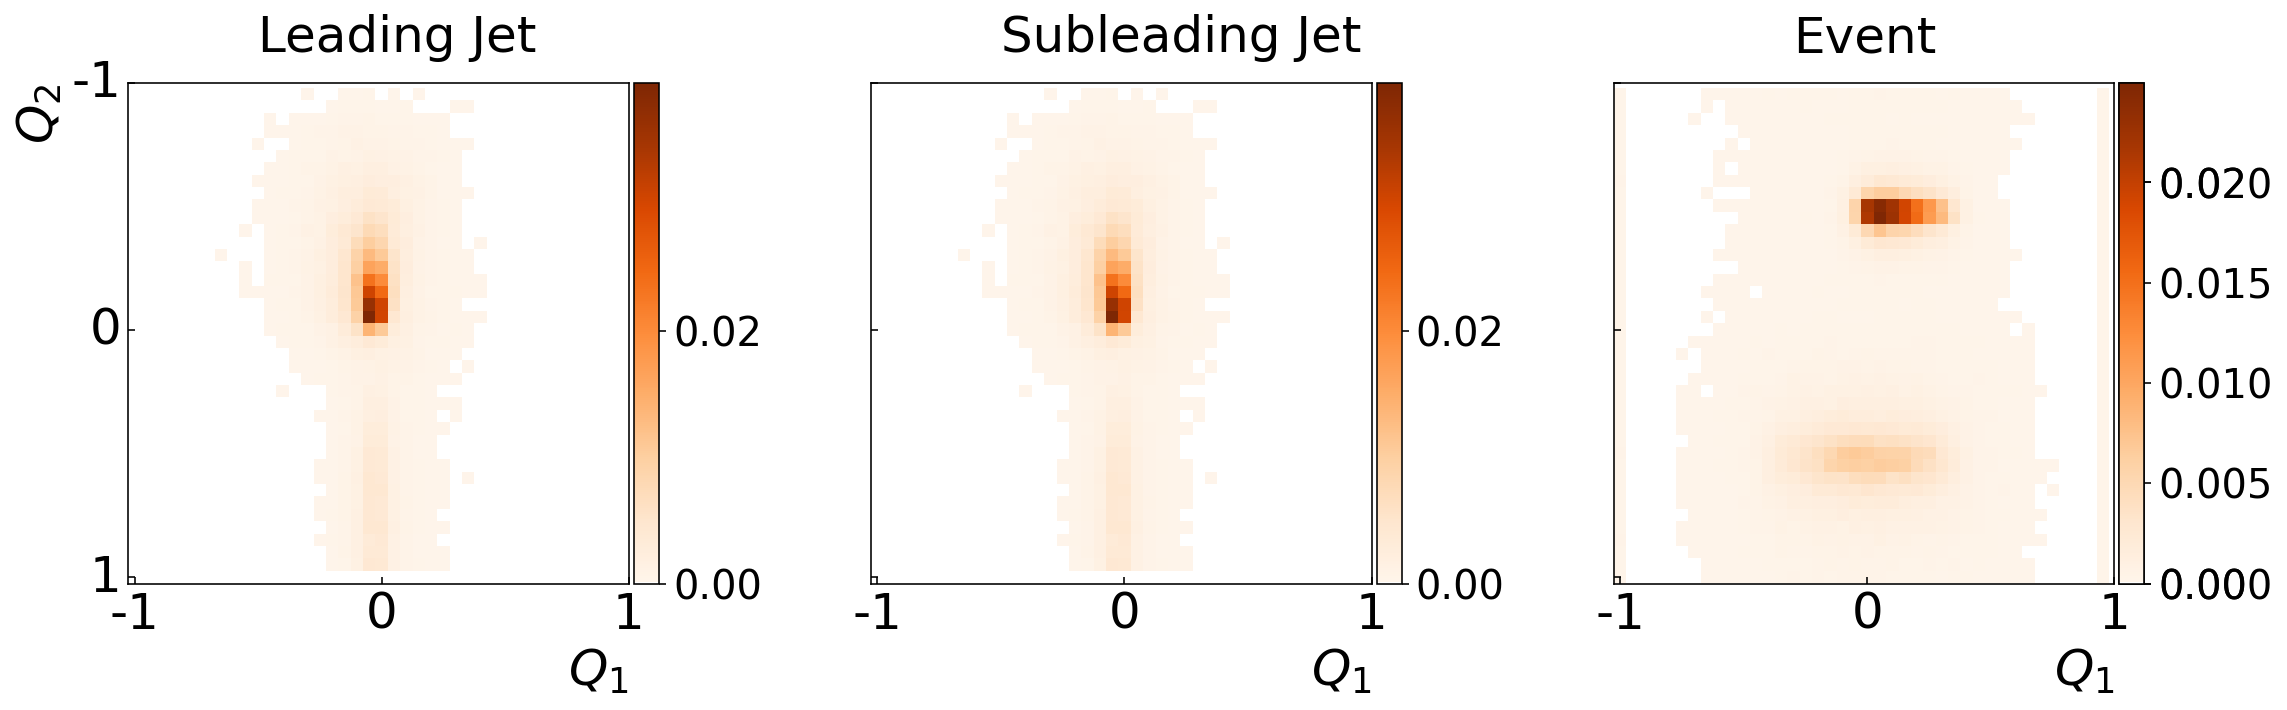

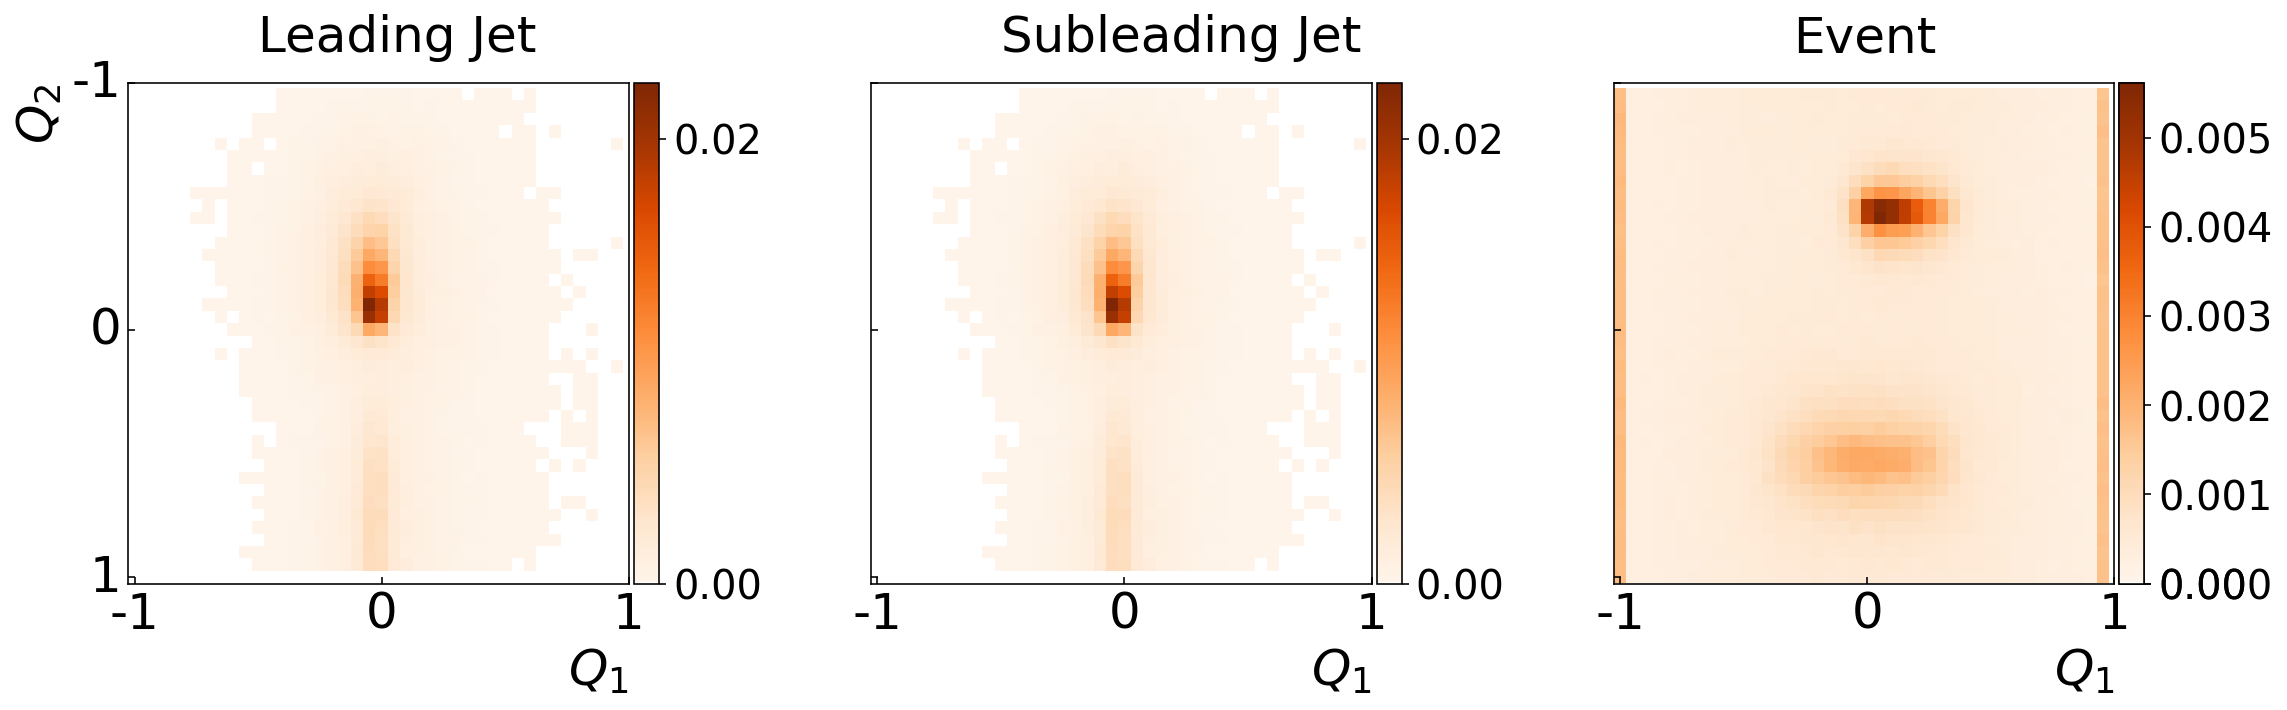

In [8]:
generate_images(x_ppbbbb[0], x_ppbbbb[1], x_ppbbbb[2])

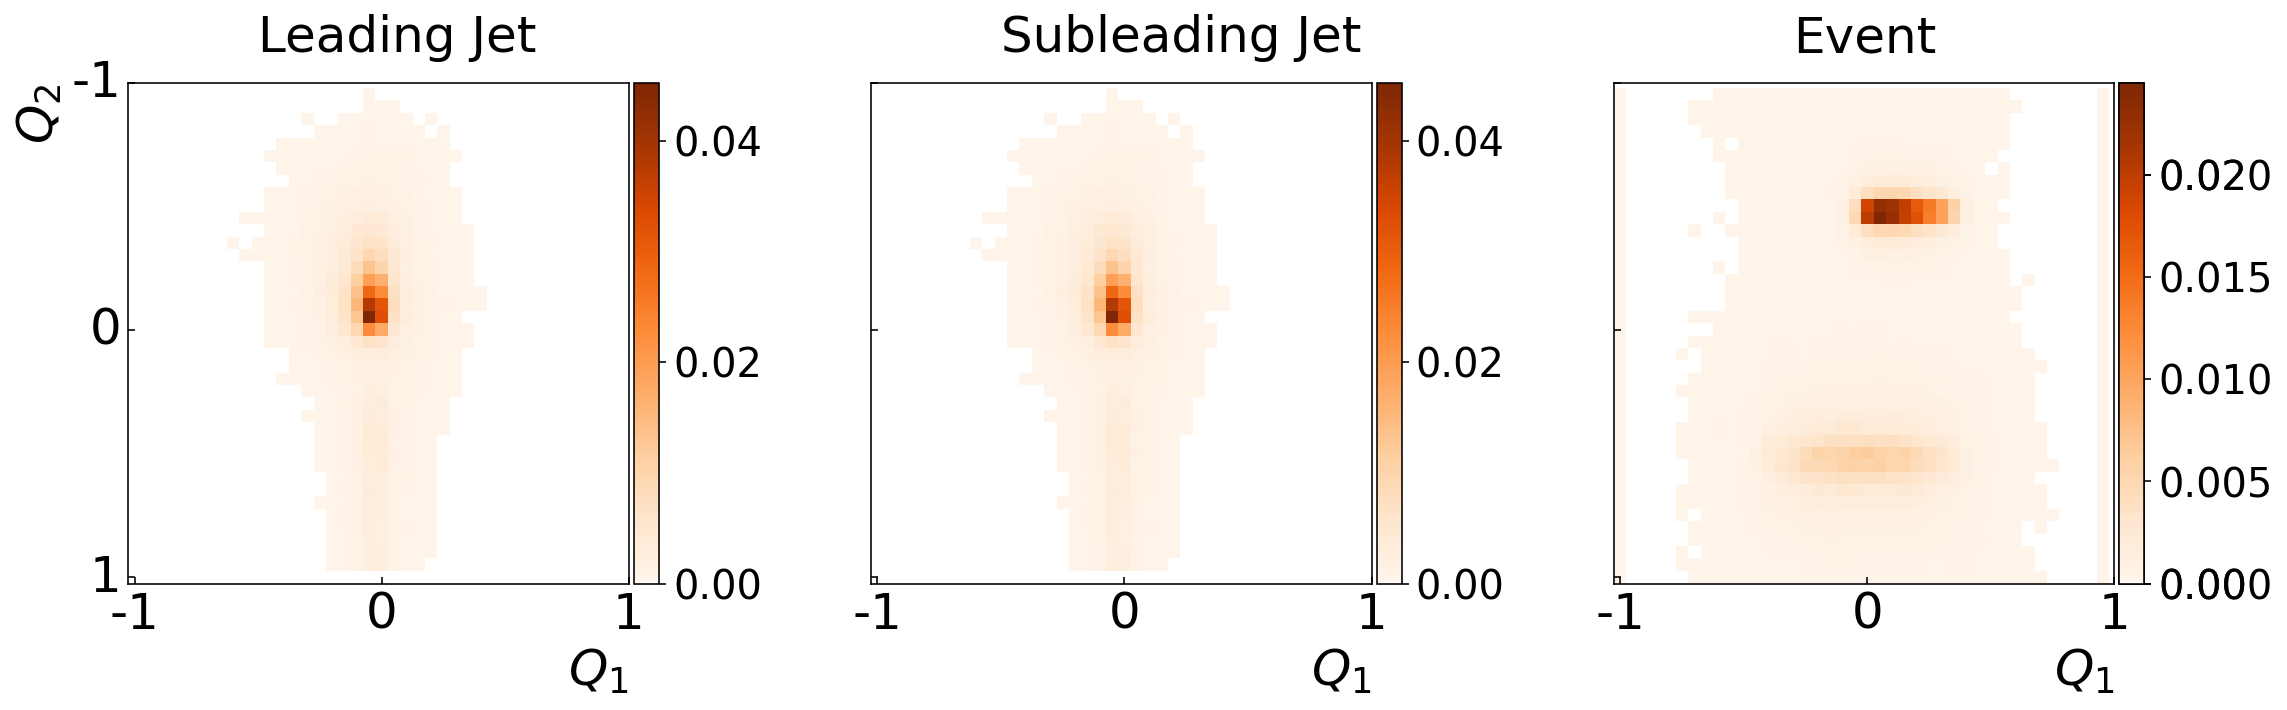

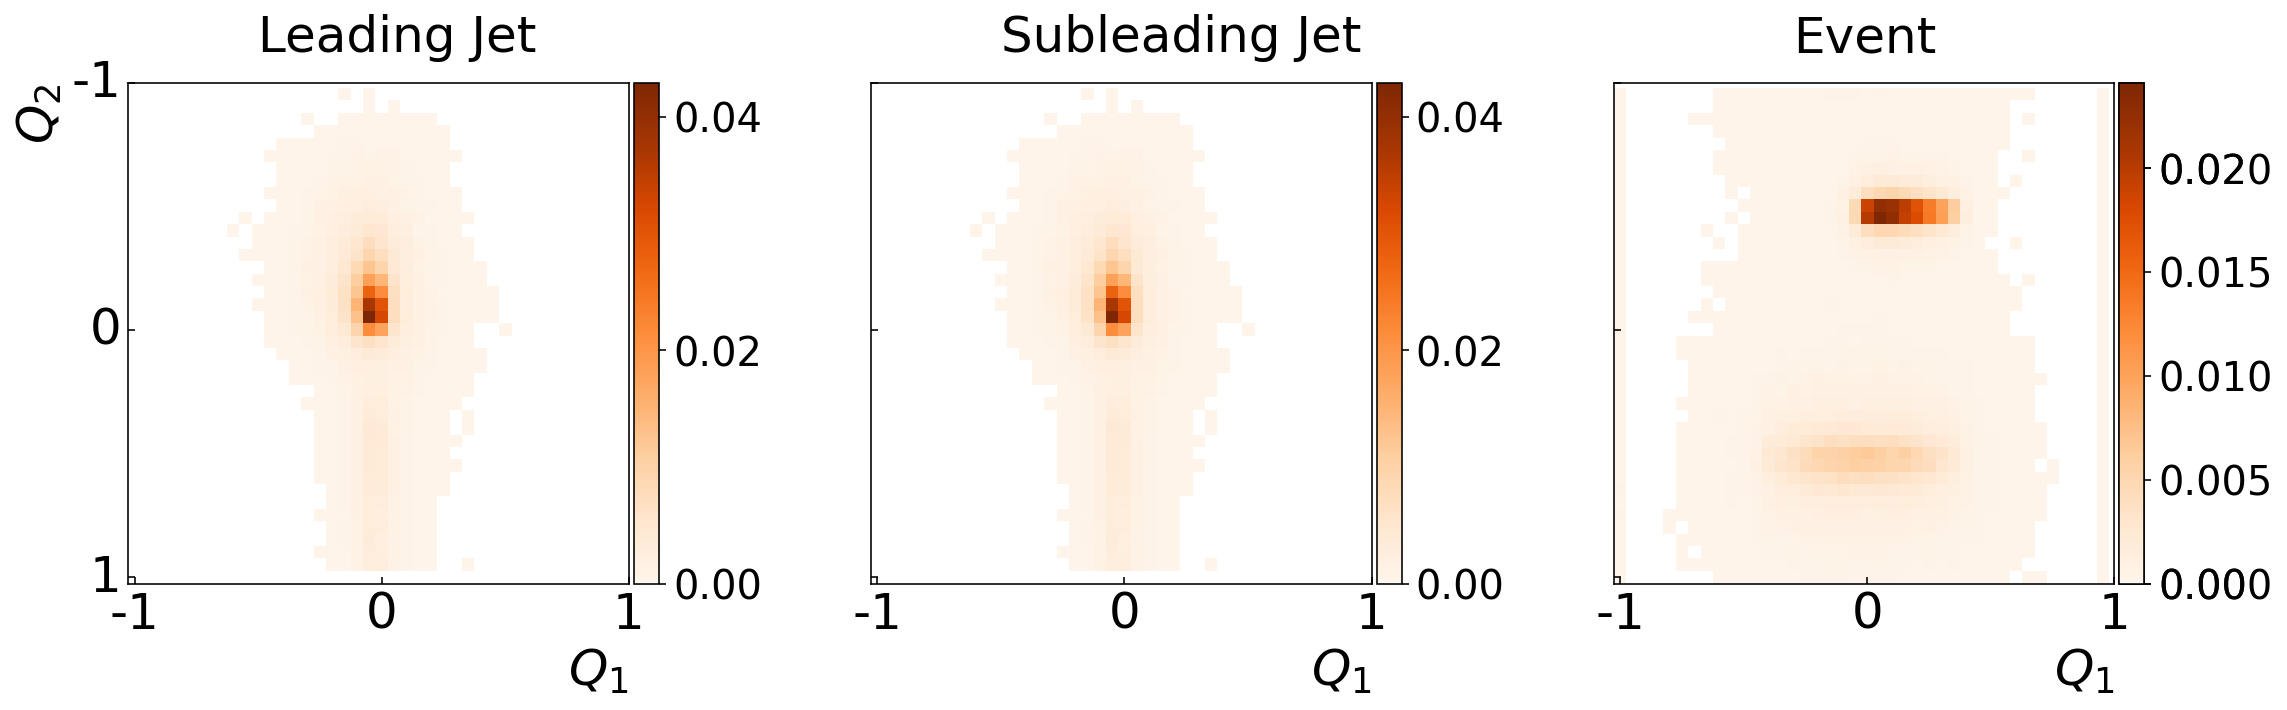

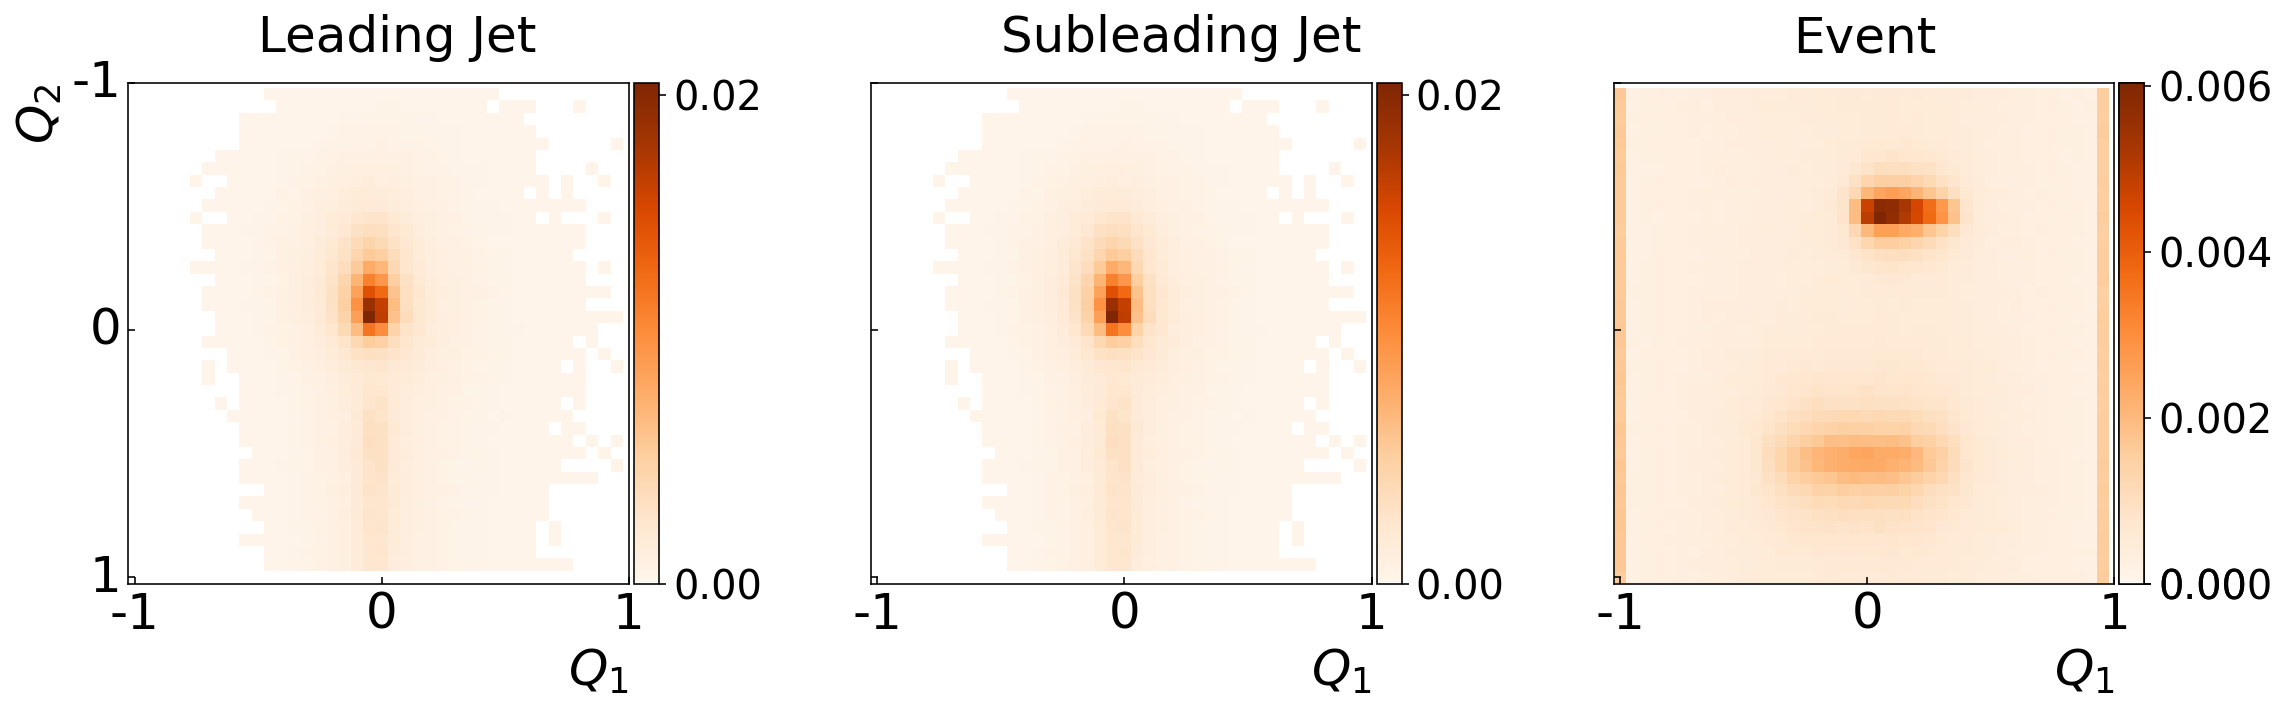

In [9]:
generate_images(x_ppjjjj[0], x_ppjjjj[1], x_ppjjjj[2])